In [16]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Flights

5-15 mins

In [2]:
united = Table.read_table('http://inferentialthinking.com/notebooks/united_summer2015.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


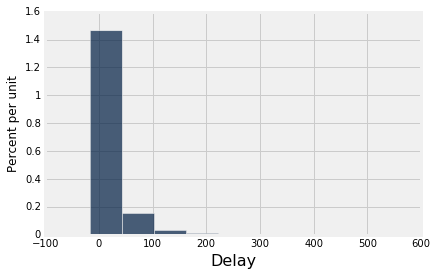

In [3]:
united.hist('Delay')

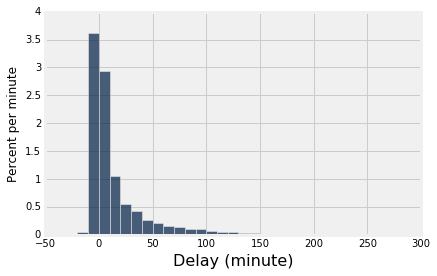

In [8]:
united.hist('Delay', bins=np.arange(-20, 301, 10), unit='minute')

Discussion question: What proportion of flights were between 10 and 20 mins late?

In [5]:
united.where('Delay', are.between(10, 20)).num_rows / united.num_rows

0.10452079566003616

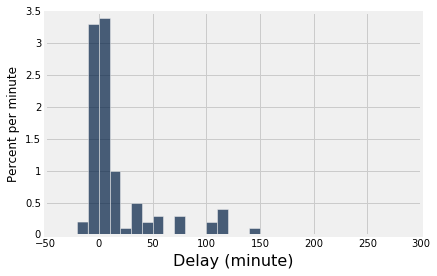

In [9]:
united.sample(100).hist('Delay', bins=np.arange(-20, 301, 10), unit='minute')

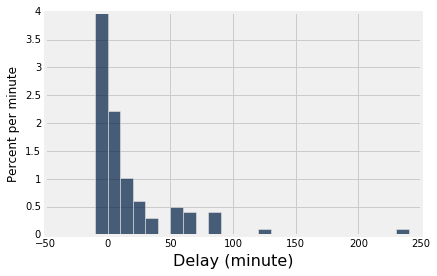

In [54]:
def united_sample_hist(n):
    united.sample(n).hist('Delay', bins=np.arange(-20, 301, 10), unit='minute')
    plt.xlim(-50, 250)
    plt.ylim(0, 0.04)
    plt.show()
    
united_sample_hist(100)

In [57]:
_ = interact(united_sample_hist, n=widgets.ToggleButtons(options=[10, 100, 1000, 10000]))

## At least one 6

15-20 mins

Roll a die 4 times. What's P(at least one 6).

In [21]:
1 - (5/6) ** 4

0.5177469135802468

In [22]:
rolls = np.arange(1, 51, 1)
at_least_one = Table().with_columns(
    'Rolls', rolls,
    'Chance of at least one 6', 1 - (5/6)**rolls
)
at_least_one.set_format(1, PercentFormatter(3))

Rolls,Chance of at least one 6
1,16.667%
2,30.556%
3,42.130%
4,51.775%
5,59.812%
6,66.510%
7,72.092%
8,76.743%
9,80.619%
10,83.849%


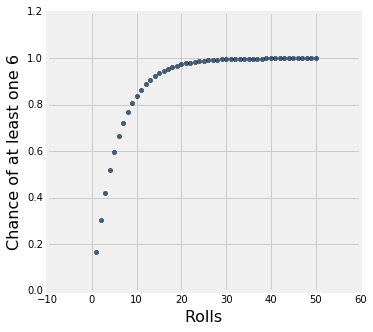

In [23]:
at_least_one.scatter('Rolls')

In [24]:
at_least_one.where('Rolls', 20)

Rolls,Chance of at least one 6
20,97.392%


In [25]:
faces = np.arange(6)+1
outcomes = np.random.choice(faces, 20)
outcomes

array([3, 2, 6, 6, 4, 1, 3, 3, 6, 6, 5, 2, 5, 2, 2, 1, 3, 6, 1, 4])

In [26]:
np.count_nonzero(outcomes==6)

5

In [27]:
trials = 1000
successes = 0

for i in np.arange(trials):
    outcomes = np.random.choice(faces, 20)
    if np.count_nonzero(outcomes==6) > 0:
        successes = successes + 1

successes/trials

0.968

## Statistics

20-25 mins

## Estimation

25-30 mins

In [59]:
def roll_20(trials):
    successes = 0

    for i in np.arange(trials):
        outcomes = np.random.choice(faces, 20)
        if np.count_nonzero(outcomes==6) > 0:
            successes = successes + 1

    return successes/trials

estimates = Table(['estimate'])
for k in np.arange(1000):
    estimates.append([roll_20(1000)])
estimates

estimate
0.975
0.976
0.971
0.966
0.966
0.968
0.975
0.973
0.972
0.975


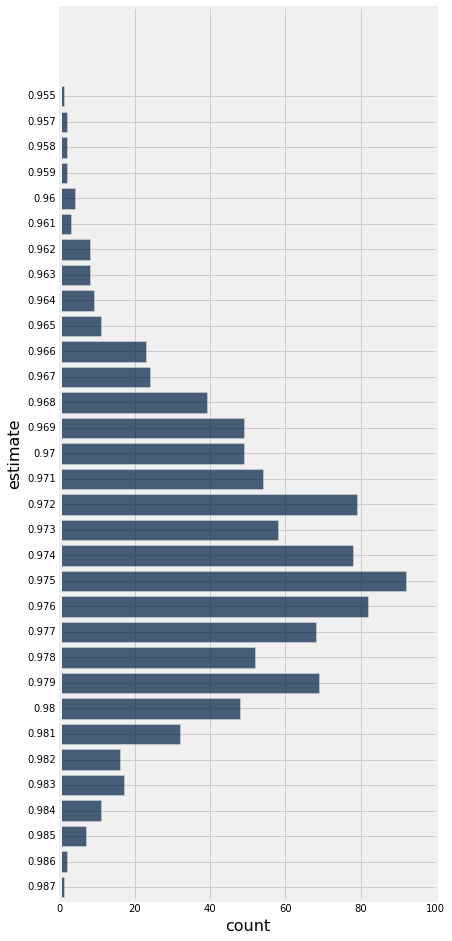

In [60]:
estimates.group(0).barh(0)

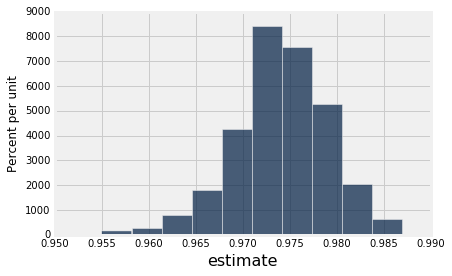

In [66]:
estimates.hist('estimate', bins=10)

## Planes

30-50 mins

In [67]:
N = 300
serialno = Table().with_column('Serial number', np.arange(N)+1)
serialno

Serial number
1
2
3
4
5
6
7
8
9
10


In [68]:
serialno.sample(30).column(0).max()

298

In [69]:
max(serialno.sample(30).column(0))

300

In [70]:
sample_size = 30
repetitions = 750

maxes = make_array()

for i in np.arange(repetitions):
    sampled_numbers = serialno.sample(sample_size).column(0)
    maxes = np.append(maxes, sampled_numbers.max())  

estimates = Table().with_column('Max serial number', maxes)

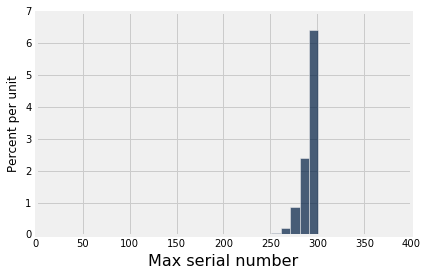

In [71]:
every_ten = np.arange(1, N+100, 10)
estimates.hist(bins=every_ten)

In [42]:
maxes = make_array()
doubles = make_array()

for i in np.arange(repetitions):
    sampled_numbers = serialno.sample(sample_size).column(0)
    maxes = np.append(maxes, sampled_numbers.max())  
    doubles = np.append(doubles, 2 * sampled_numbers.mean())

estimates = Table().with_columns(
    'Max', maxes,
    '2 * average', doubles
)

estimates

Max,2 * average
287,281.067
298,301.733
297,309.933
296,258
299,252
297,247.6
286,325
300,366
283,285.133
293,272.4


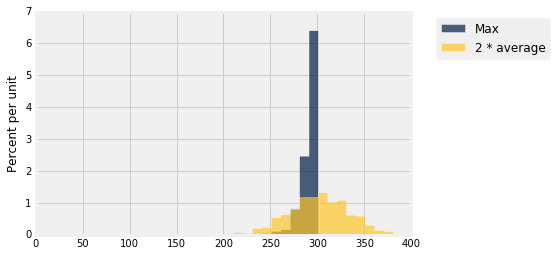

In [43]:
estimates.hist(bins=every_ten)